In [1]:
# Testing some animations
using Plots
using Random

gr()

Plots.GRBackend()

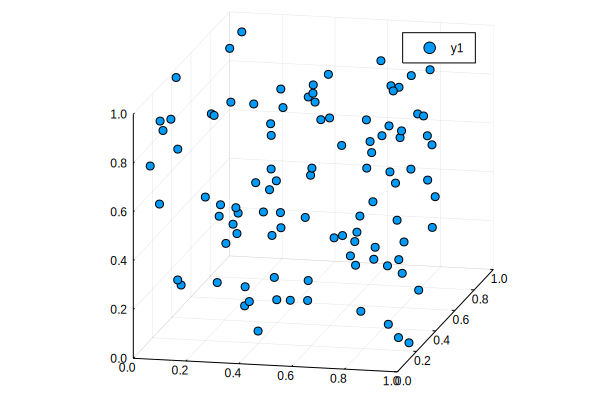

In [2]:
x = rand(100)
y = rand(100)
z = rand(100)
scatter(x, y, z, lims=(0,1), camera=(30,30), aspect_ratio=1)
plot!(camera=(20, 40))

In [3]:
rng1 = MersenneTwister()

cube_matrix = rand(rng1, 100, 50, 3)
δ = 0.01
for i in 2:size(cube_matrix, 1)
    for p in 1:size(cube_matrix, 2)
        for d in 1: size(cube_matrix, 3)            
            cube_matrix[i, p, d] = cube_matrix[i-1, p, d] + rand(rng1) * δ - δ/2
        end
    end
end
t = 4
types = rand(1:t, 50, 1)
colors = [:blue, :lightgreen, :red, :yellow, :black]
function color_types(types, colors)
    colormap = Array{Symbol}(undef, size(types))
    for i in eachindex(types)
        colormap[i] = colors[types[i] % size(colors, 1)]
    end
    return colormap
end
colorm = color_types(types, colors);

┌ Info: Saved animation to 
│   fn = C:\Users\enric\Desktop\gitrepos\molecular-dynamics-cuda\main\anim_fps30.gif
└ @ Plots C:\Users\enric\.julia\packages\Plots\qZHsp\src\animation.jl:98


Plots.AnimatedGif("C:\\Users\\enric\\Desktop\\gitrepos\\molecular-dynamics-cuda\\main\\anim_fps30.gif")
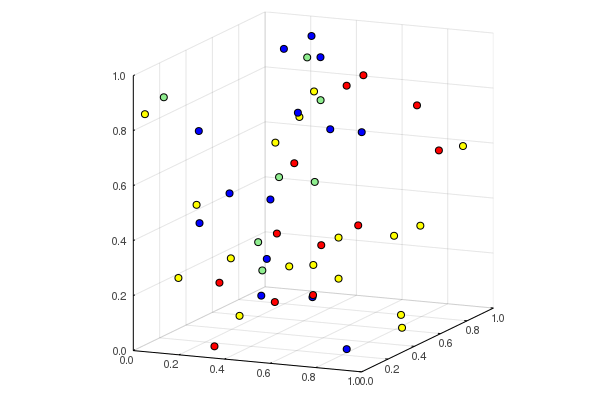

In [4]:
animation = begin
    @animate for i in 1:size(cube_matrix, 1)
        
        @views scatter(cube_matrix[i, :, 1], 
                       cube_matrix[i, :, 2], 
                       cube_matrix[i, :, 3], 
                       lims=(0, 1), 
                       legend=false,
                       aspect_ratio=1,
                       markercolors=colorm)
                #linetype=:scatter)
        #plot!(camera=(i, 30))
        
    end every 1
end

gif(animation, "./anim_fps30.gif", fps = 30)

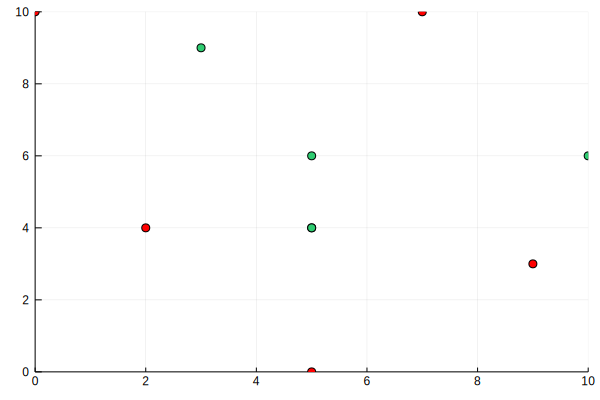

In [12]:
mx = rand(0:10, 10, 2)
types = rand(1:2, 10, 1)

scatter(mx[:,1], mx[:,2], lims=(0,10), markershape = [:circle], markercolors = ["#ff0000", "#2ECC71"], legend=false)

In [6]:
mx

10×2 Array{Int64,2}:
  0   6
 10  10
  4   4
  8  10
  7   7
  9   3
  2   0
 10   0
  9   9
  7   0

In [7]:
types

10×1 Array{Int64,2}:
 1
 1
 1
 2
 1
 1
 2
 2
 2
 2